In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
file_path = "MYG-Survey-new.csv"
df = pd.read_csv(file_path)

In [4]:
# --- Cleaning ---
# Drop unnamed column
df_cleaned = df.drop(columns=["Unnamed: 13"])

In [5]:
# Strip whitespaces in column names
df_cleaned.columns = df_cleaned.columns.str.strip()

In [6]:
# Fill missing data
df_cleaned["Birth-Date"] = df_cleaned["Birth-Date"].fillna("Unknown")
df_cleaned["Faith"] = df_cleaned["Faith"].fillna("Unknown")
df_cleaned["Qualification"] = df_cleaned["Qualification"].fillna("Unknown")
df_cleaned["Remarks"] = df_cleaned["Remarks"].fillna("None")

In [7]:
# Find duplicates by Full-Name
duplicates = df_cleaned[df_cleaned.duplicated(subset=["Full-Name"], keep=False)]

In [8]:
duplicates

,Full-Name,Head-of-Family,Village,Gender,Birth-Date,Age,Blood-Group,Marital-Status,Immigration-Status,Occupation,Faith,Qualification,Remarks
769,Julie Anthony Dmello,Julie Dmello,Inodi-Boriwadi,F,07-04-1949,74,Unknown,Married,India,Retired,Roman Catholic,M.A/ M.ed,-
1509,Maxson Gonsalves,Maxson Gonsalves,Nansherwadi,M,16-01-1971,52,Unknown,Married,India,Service,Roman Catholic,-,None
1550,Sanjay Gonsalves,Sanjay Gonsalves,Nansherwadi,M,Unknown,40,Unknown,Married,India,Service,Roman Catholic,-,None
1559,Maxson Gonsalves,Maxson Gonsalves,Nansherwadi,M,Unknown,35,Unknown,Married,India,Service,Roman Catholic,-,IT
1570,Sanjay Gonsalves,Sanjay Gonsalves,Nansherwadi,M,Unknown,47,Unknown,Married,India,Service,Roman Catholic,-,None
1632,Swapnil Dmello,Swapnil Dmello,Nansherwadi,M,04-09-1986,37,Unknown,Married,India,Service,Roman Catholic,-,Ship
1635,Swapnil Dmello,Swapnil Dmello,Nansherwadi,M,18-08-1984,39,Unknown,Married,India,Service,Roman Catholic,-,Ship
1779,Julie Anthony Dmello,Anthony Dmello,Nanthiwadi,F,23-01-1954,69,A+,Married,India,Homemaker,Roman Catholic,SSC,None


In [9]:
# Missing value summary
missing_summary = df_cleaned.isnull().sum()

In [10]:
missing_summary

Full-Name             0
Head-of-Family        0
Village               0
Gender                0
Birth-Date            0
Age                   0
Blood-Group           0
Marital-Status        0
Immigration-Status    0
Occupation            0
Faith                 0
Qualification         0
Remarks               0
dtype: int64

# --- Visualizations ---

In [23]:
plt.figure(figsize=(16, 15))

<Figure size 1600x1500 with 0 Axes>

<Figure size 1600x1500 with 0 Axes>

C:\Users\falca\AppData\Local\Temp\ipykernel_24636\4135121363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Gender", data=df_cleaned, palette="Set2")


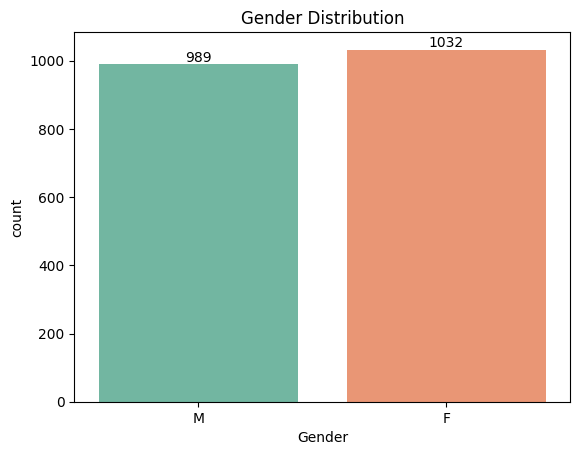

In [24]:
# Gender distribution
plt.subplot(1, 1, 1)
ax = sns.countplot(x="Gender", data=df_cleaned, palette="Set2")
plt.title("Gender Distribution")

# Add the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


C:\Users\falca\AppData\Local\Temp\ipykernel_24636\2578930098.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=village_counts.index, x=village_counts.values, palette="viridis")


Text(0, 0.5, 'Village')

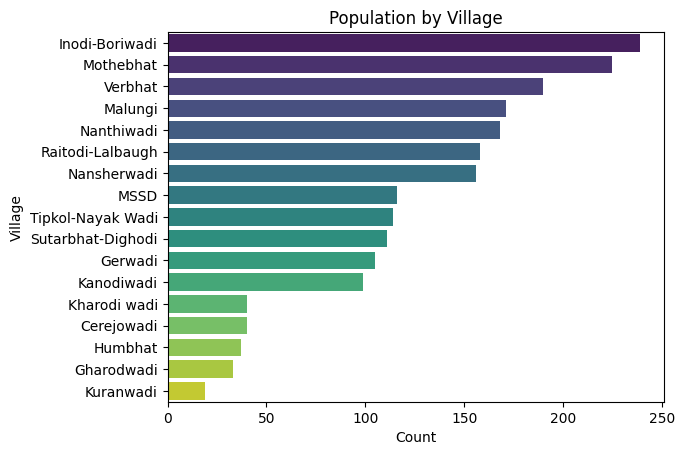

In [25]:
# Village population
plt.subplot(1, 1, 1)
village_counts = df_cleaned["Village"].value_counts().sort_values(ascending=False)
sns.barplot(y=village_counts.index, x=village_counts.values, palette="viridis")
plt.title("Population by Village")
plt.xlabel("Count")
plt.ylabel("Village")

Text(0.5, 1.0, 'Age Distribution')

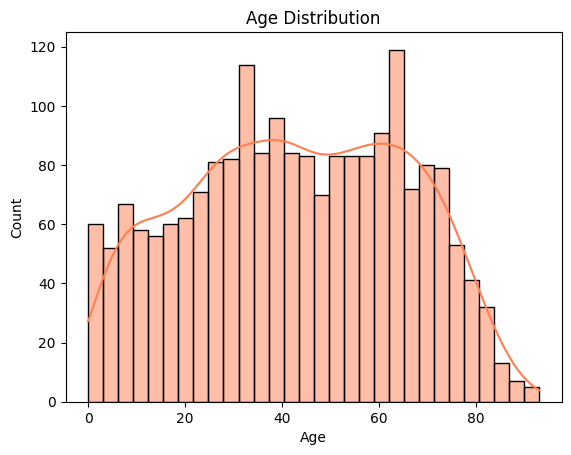

In [26]:
# Age distribution
plt.subplot(1, 1, 1)
sns.histplot(df_cleaned["Age"], bins=30, kde=True, color="coral")
plt.title("Age Distribution")

C:\Users\falca\AppData\Local\Temp\ipykernel_24636\620539029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Marital-Status", data=df_cleaned, palette="coolwarm")


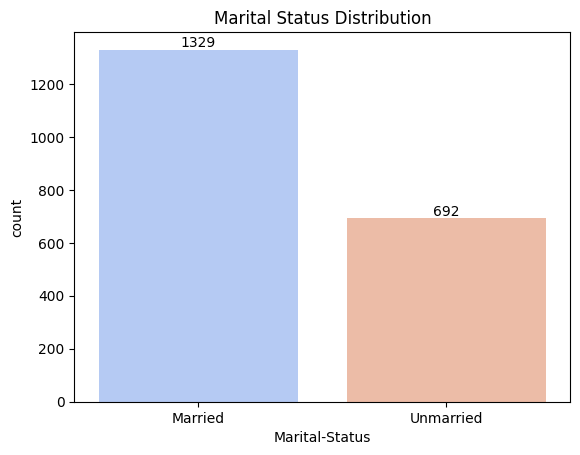

In [27]:
# Marital status
plt.subplot(1, 1, 1)
ax = sns.countplot(x="Marital-Status", data=df_cleaned, palette="coolwarm")
plt.title("Marital Status Distribution")

# Add the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [28]:
# --- Head-of-Family Analysis ---
hof_structure = df_cleaned["Head-of-Family"].value_counts().head(10)

In [29]:
# --- Save cleaned dataset ---
cleaned_file_path = "MYG_Survey_Cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

In [30]:
# --- Analyze Qualifications, Occupation, Immigration ---
qualification_counts = df_cleaned["Qualification"].value_counts().head(15)
occupation_counts = df_cleaned["Occupation"].value_counts().head(15)
immigration_counts = df_cleaned["Immigration-Status"].value_counts()

In [31]:
# Output summary
print("Duplicates:\n", duplicates)
print("\nMissing Summary:\n", missing_summary)
print("\nTop Head-of-Family Counts:\n", hof_structure)
print("\nTop Qualifications:\n", qualification_counts)
print("\nTop Occupations:\n", occupation_counts)
print("\nImmigration Distribution:\n", immigration_counts)

Duplicates:
                  Full-Name    Head-of-Family         Village Gender  \
769   Julie Anthony Dmello      Julie Dmello  Inodi-Boriwadi      F   
1509      Maxson Gonsalves  Maxson Gonsalves     Nansherwadi      M   
1550      Sanjay Gonsalves  Sanjay Gonsalves     Nansherwadi      M   
1559      Maxson Gonsalves  Maxson Gonsalves     Nansherwadi      M   
1570      Sanjay Gonsalves  Sanjay Gonsalves     Nansherwadi      M   
1632        Swapnil Dmello    Swapnil Dmello     Nansherwadi      M   
1635        Swapnil Dmello    Swapnil Dmello     Nansherwadi      M   
1779  Julie Anthony Dmello    Anthony Dmello      Nanthiwadi      F   

      Birth-Date  Age Blood-Group Marital-Status Immigration-Status  \
769   07-04-1949   74     Unknown        Married              India   
1509  16-01-1971   52     Unknown        Married              India   
1550     Unknown   40     Unknown        Married              India   
1559     Unknown   35     Unknown        Married              I

In [33]:
# Standardize occupation entries
df_cleaned["Occupation"] = df_cleaned["Occupation"].str.lower().str.strip()
df_cleaned["Occupation"] = df_cleaned["Occupation"].replace({
    "housewife": "homemaker",
    "house wife": "homemaker",
    "house-wife": "homemaker",
    "retired": "retired",
    "self employed": "self-employed",
    "self employed": "self-employed",
    "service": "service",
    "student": "student",
    "unemployed": "unemployed",
})

# Capitalize Faith and Immigration for consistency
df_cleaned["Faith"] = df_cleaned["Faith"].str.title().str.strip()
df_cleaned["Immigration-Status"] = df_cleaned["Immigration-Status"].str.title().str.strip()

# Re-save cleaned version
df_cleaned.to_csv("MYG_Survey_Cleaned_Standardized.csv", index=False)


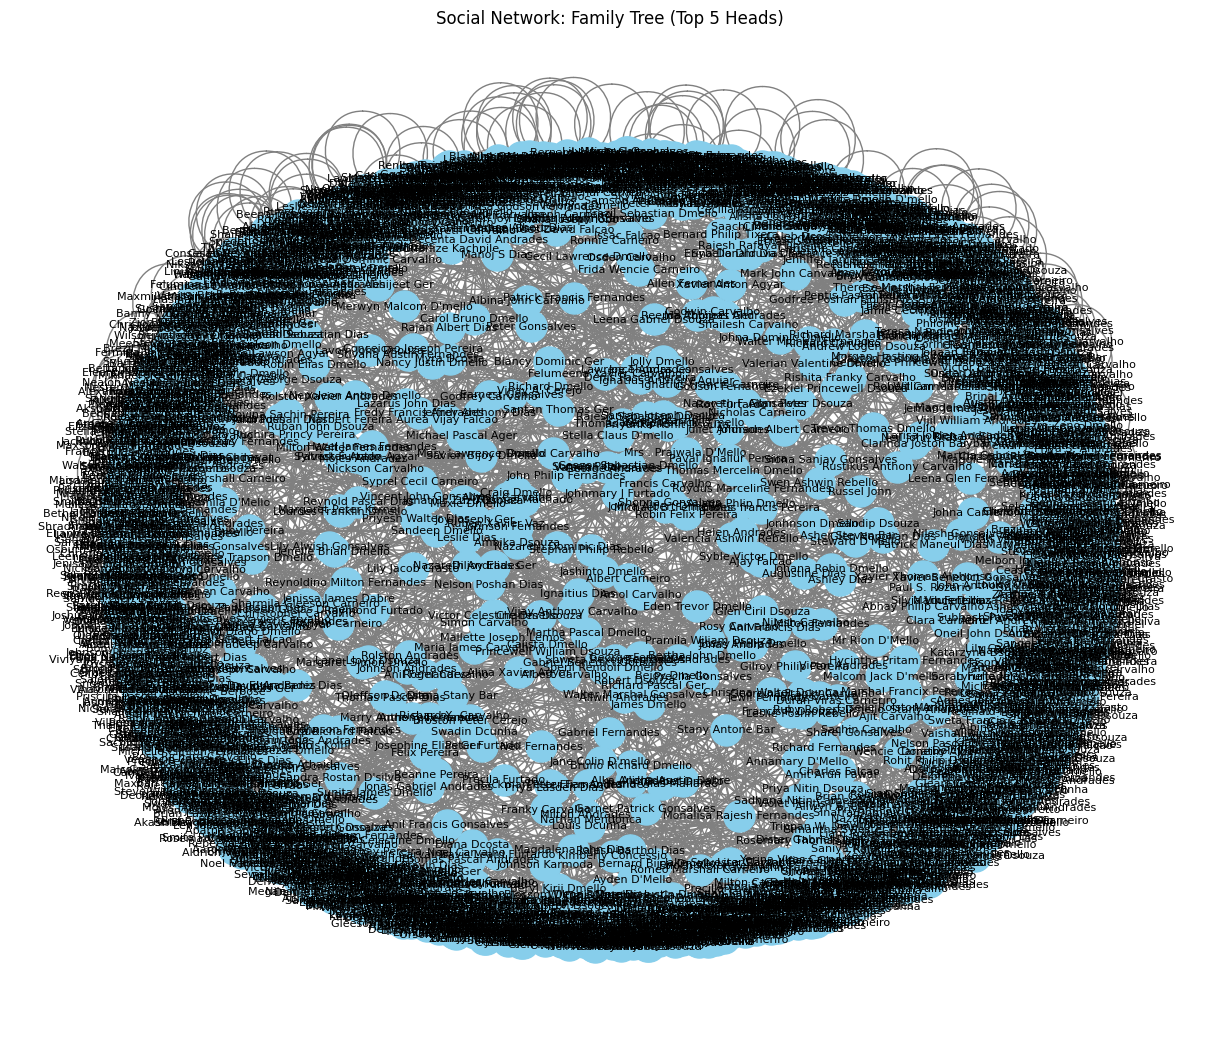

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Build family tree graph
G = nx.Graph()

# Add edges from Head-of-Family to each member
for _, row in df_cleaned.iterrows():
    hof = row["Head-of-Family"]
    member = row["Full-Name"]
    G.add_edge(hof, member)

# Plot for top 5 families
top_heads = df_cleaned["Head-of-Family"].value_counts().head(5).index
plt.figure(figsize=(12, 10))
subgraph = G.subgraph([n for n in G if df_cleaned["Head-of-Family"].isin(top_heads).any()])
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Social Network: Family Tree (Top 5 Heads)")
plt.show()
